In [1]:
import pandas as pd
from mapping import supported_genres

In [2]:
user_data = pd.read_csv(
    '../interaction_data.csv'
)
data = pd.read_csv(
    '../edadata.csv'
)

In [3]:
# Убедись, что item_id в обоих датафреймах одного типа
user_data['item_id'] = user_data['item_id'].astype(int)
data['item_id'] = data['item_id'].astype(int)

# Объединяем
merged = user_data.merge(data[['item_id', 'genre']], on='item_id', how='left')

In [4]:
# Создаём обратный маппинг из supported_genres
idx_to_genre = {idx: genre for idx, genre in enumerate(supported_genres)}

# Декодируем числовой жанр в название
merged['genre_name'] = merged['genre'].map(idx_to_genre)

# Проверка на пропущенные значения (если genre был NaN или вне диапазона)
if merged['genre_name'].isna().any():
    bad_genres = merged.loc[merged['genre_name'].isna(), 'genre'].unique()
    raise ValueError(f"Обнаружены некорректные значения жанров: {bad_genres}")

# Количество взаимодействий по жанрам
genre_counts = merged['genre_name'].value_counts()
print(genre_counts)

genre_name
Pop                 16896
Ska                 16236
Reggaeton           16034
Country             14826
Children's Music    14740
Hip-Hop             14700
Opera               13756
Folk                13744
R&B                 13258
Reggae              13031
Soul                12004
Anime               11583
Rap                 11480
Blues               10593
Rock                10359
World                9493
Soundtrack           9468
Alternative          9346
Jazz                 8989
Comedy               7979
Dance                7847
A Capella            6639
Electronic           6482
Classical            3190
Indie                2815
Movie                  23
Name: count, dtype: int64


C:\Users\mypc\AppData\Local\Temp\ipykernel_8732\1798662878.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


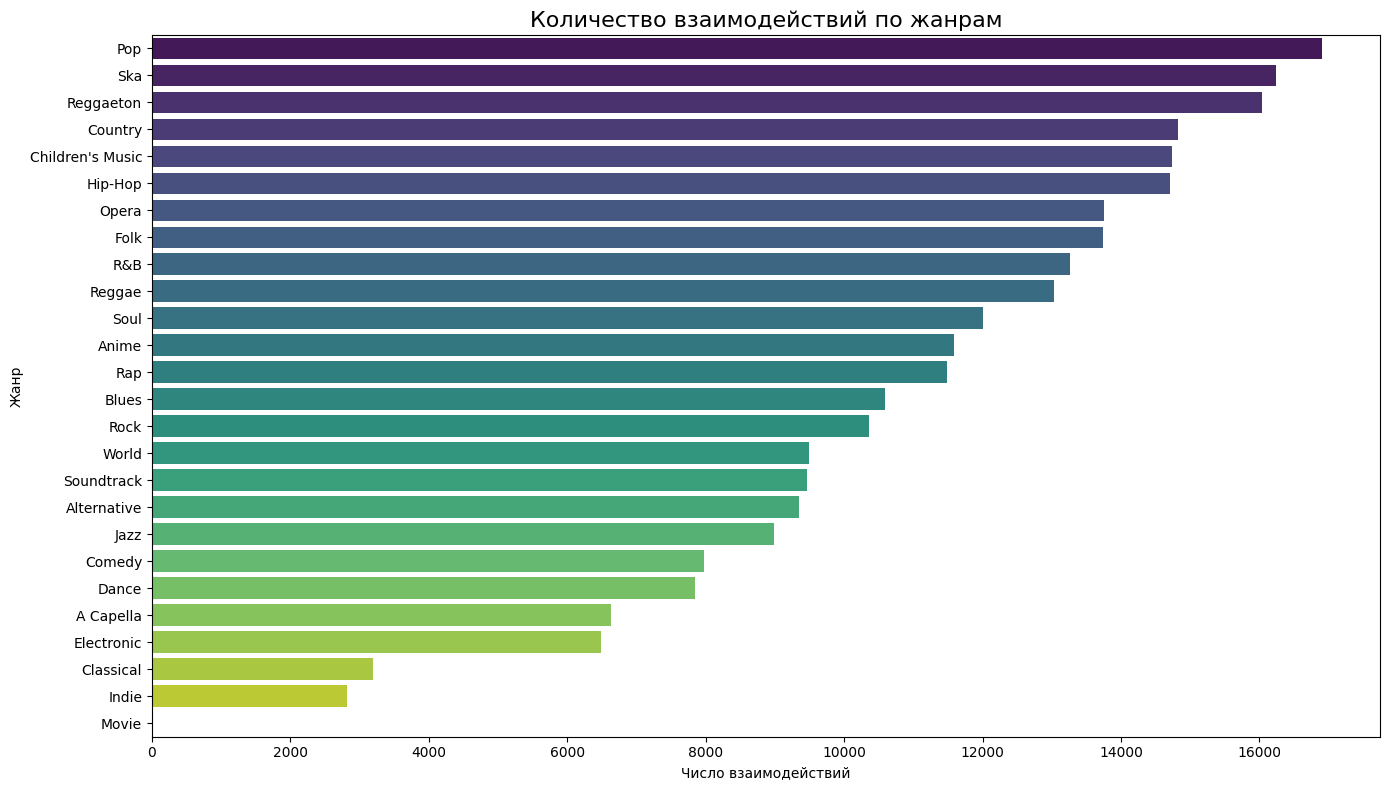

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, у тебя уже есть merged DataFrame с колонкой 'genre_name'
# Если нет — восстановим его быстро:

idx_to_genre = {i: g for i, g in enumerate(supported_genres)}

# Загружаем данные
user_data = pd.read_csv("../interaction_data.csv")
tracks_df = pd.read_csv("../edadata.csv")
tracks_df['genre_name'] = tracks_df['genre'].map(idx_to_genre)

# Объединяем
merged = user_data.merge(tracks_df[['item_id', 'genre_name']], on='item_id', how='left')

# Считаем взаимодействия по жанрам
genre_counts = merged['genre_name'].value_counts().sort_values(ascending=False)

# Визуализация
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Количество взаимодействий по жанрам", fontsize=16)
plt.xlabel("Число взаимодействий")
plt.ylabel("Жанр")
plt.tight_layout()
plt.show()